In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use("seaborn")
sns.set(font_scale=1.5)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Titanic

- [https://www.kaggle.com/c/titanic/overview/tutorials](https://www.kaggle.com/c/titanic/overview/tutorials)
- 위의 링크는 캐글에서 Titanic 페이지입니다.

- 위의 데이터는 Binary classification을 연습해 볼 수 있는 문제입니다.
- Titanic의 생존자와 사망자를 예측해내는 것이 목표입니다. 
- metric은 accuracy(정확도)입니다.

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

|  변수명  | 정의 | 키 |
|:--------:|:----:|:---|
|  	PassengerId | 승객번호  |    |
| Survived |  생존여부 |  0 = 사망, 1 = 생존  |
| Pclass |  티켓 클래스(선실의 종류) | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| Name |  이름 |  각 해당 인원의 이름  |
| Sex |  성별 |  male, female  |
| Age |  나이 |    |
| SibSp |  형제나 배우자의 탑승한 수|    |
| parch |  부모나 자식의 탑승한 수|    |
|	Ticket  |  티켓 넘버|    |
| Fare |  티켓 요금|    |
| Cabin |  선실 번호|    |
| Embarked | 승선한 항구| C = Cherbourg, Q = Queenstown, S = Southampton   |

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


간단히 train data에서 numerical한 데이터에 대해서 살펴보면 다음과 같다.

In [7]:
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 추가
위의 정보를 보았을때, train set에서는 결측된 정보를 포함하고 있는 피처가 Age, Cabin, 그리고 Embarked에 결측값이 존재함을 알 수 있다. test set에서는 Age, Fare, Cabin에 결측값이 존재함을 알 수 있다.

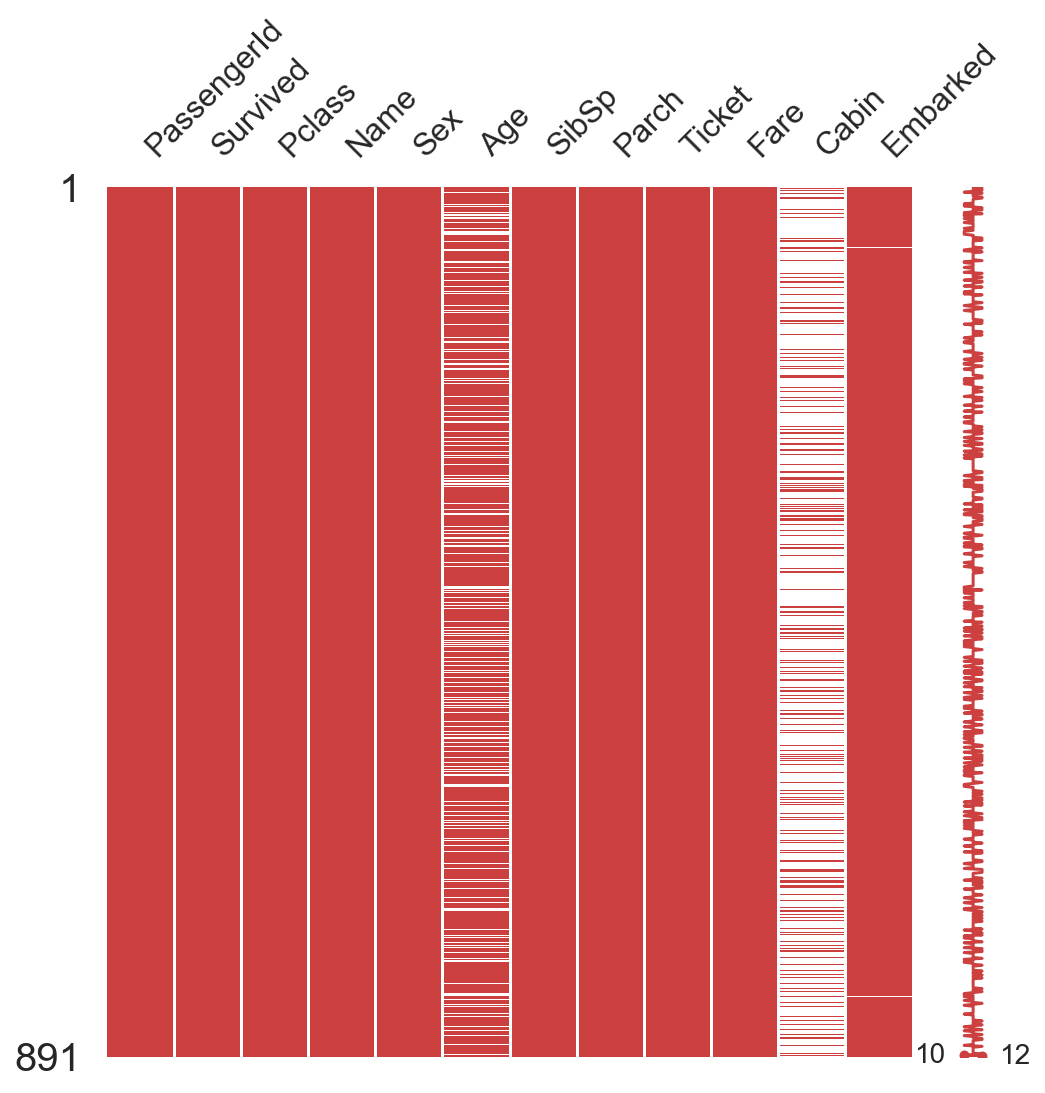

In [9]:
# 위의 결측값의 존재를 시각적으로 표현하는 방법(이유한님의 유튜브를 보면 추가한 것이다.)
msno.matrix(df=train, figsize=(8,8), color=(0.8, 0.25, 0.25)) # color의 인자는 RGB순의 값이다.

#msno.bar(df=train, figsize=(8,8), color=(0.8, 0.25, 0.25))
# 위의 코드는 막대 그래프로 결측값의 비율을 보여주는 그래프를 만들어주는 코드이다.

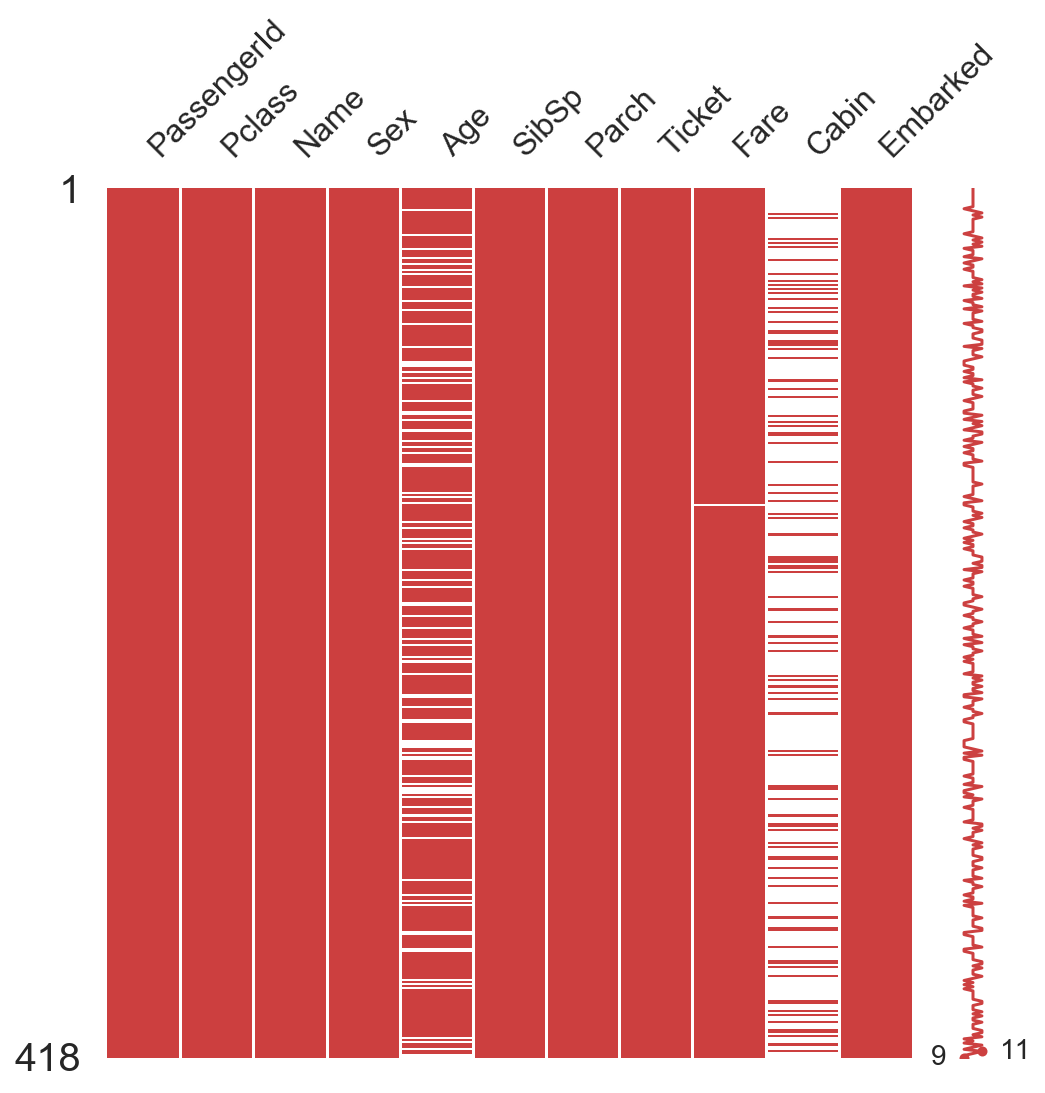

In [10]:
msno.matrix(df=test, figsize=(8,8), color=(0.8, 0.25, 0.25))

## Survived
- 우리의 데이터는 다음에서 보는 것과 같이 다행히도 imbalanced data는 아니라고 볼 수 있다.

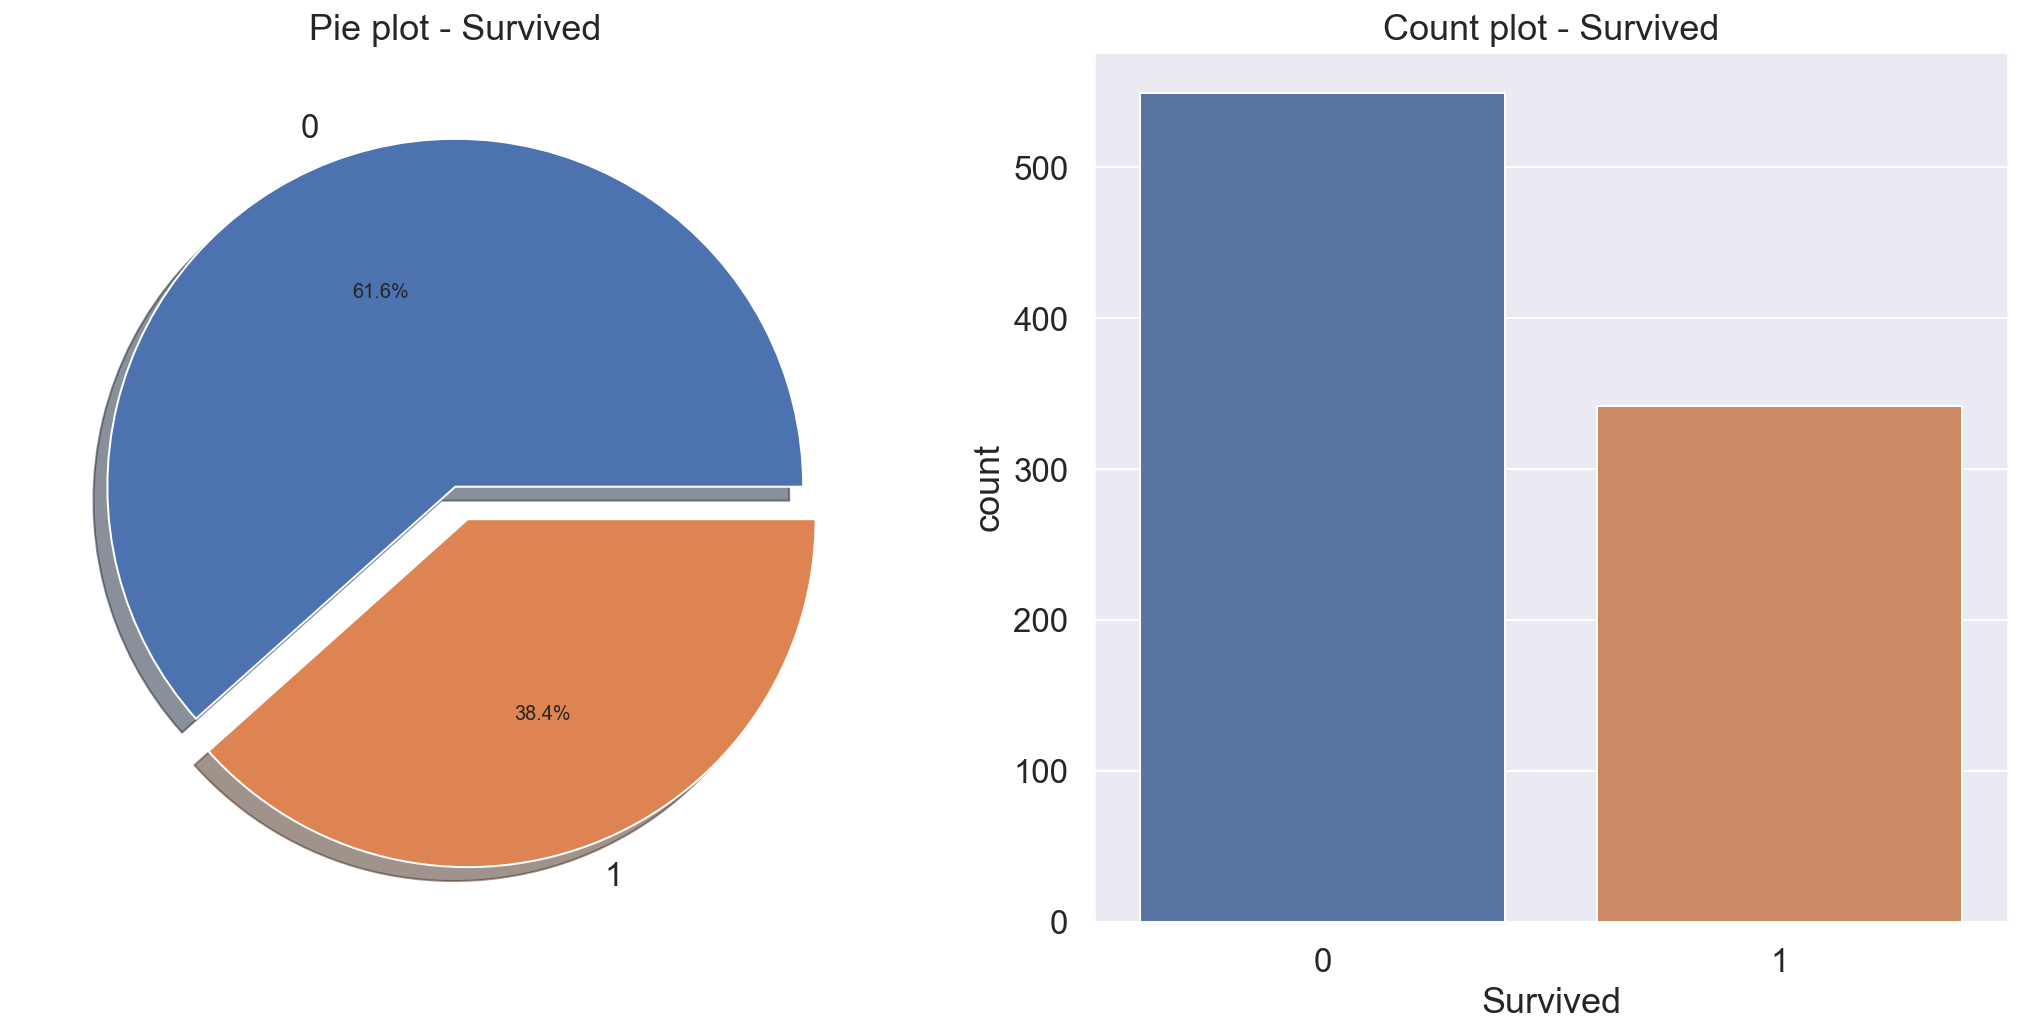

In [11]:
#### 추가
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# plt.subplot(1, 2, 1)
# plt.plot(train["Survived"].value_counts())
# matplotlib이외에도 plotly라는 패키지도는 interactive한 plot을 그려줌으로 잘 익혀놓아야 한다!
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# plt.subplot(1, 2, 1)
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [12]:
for col_name in list(train.columns):
    print("{}의 unique한 data의 갯수 : {} 개".format(col_name,len(set(train[col_name]))))

PassengerId의 unique한 data의 갯수 : 891 개
Survived의 unique한 data의 갯수 : 2 개
Pclass의 unique한 data의 갯수 : 3 개
Name의 unique한 data의 갯수 : 891 개
Sex의 unique한 data의 갯수 : 2 개
Age의 unique한 data의 갯수 : 265 개
SibSp의 unique한 data의 갯수 : 7 개
Parch의 unique한 data의 갯수 : 7 개
Ticket의 unique한 data의 갯수 : 681 개
Fare의 unique한 data의 갯수 : 248 개
Cabin의 unique한 data의 갯수 : 148 개
Embarked의 unique한 data의 갯수 : 4 개


In [13]:
for col_name in list(test.columns):
    print("{}의 unique한 data의 갯수 : {} 개".format(col_name,len(set(train[col_name]))))

PassengerId의 unique한 data의 갯수 : 891 개
Pclass의 unique한 data의 갯수 : 3 개
Name의 unique한 data의 갯수 : 891 개
Sex의 unique한 data의 갯수 : 2 개
Age의 unique한 data의 갯수 : 265 개
SibSp의 unique한 data의 갯수 : 7 개
Parch의 unique한 data의 갯수 : 7 개
Ticket의 unique한 data의 갯수 : 681 개
Fare의 unique한 data의 갯수 : 248 개
Cabin의 unique한 data의 갯수 : 148 개
Embarked의 unique한 data의 갯수 : 4 개


PassengerId는 단순히 탑승객에 임의로 부여한 번호이거나 탐승객이 탑승한 순서에 대한 번호이므로 중요한 피처가 아니므로 제거해준다. 또한, Name 피처를 보게 되면 891개로 각각의 승선한 인원의 이름이 다 다르다는 것을 확인 할 수 있으며, 모든 승선이름이 다르므로 불필요한 피처라 생각되어 이 또한 제거할 것이다.

요약) 불필요한 피처 제거 (제거한 피처들)

- 1) PassengerId
- 2) Name
- 3) 

In [14]:
train.drop(columns=["PassengerId", "Name"], axis=1, inplace=True)
test.drop(columns=["PassengerId", "Name"], axis=1, inplace=True)

## Pclass

- Pclass값이 낮을 수록 즉, 더 좋은 칸에 승선할 수록 생존할 확률이 높아진다.

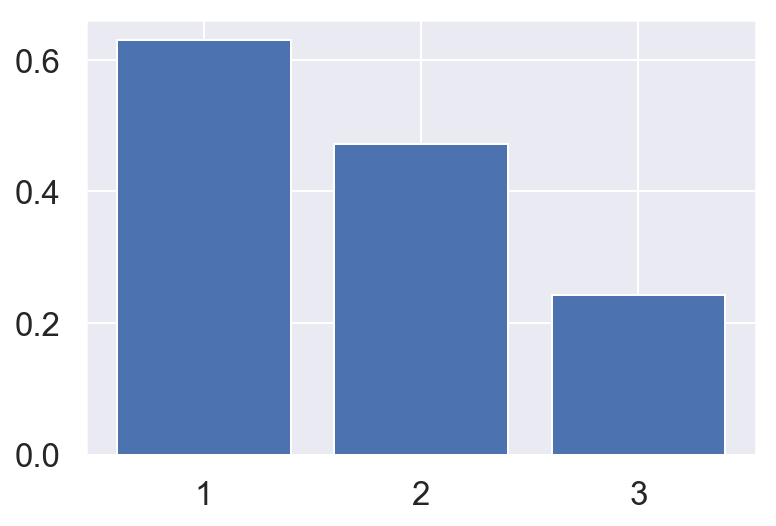

In [15]:
def Survived_by_columns_with_plot(data, col):
    table1=(data[data.Survived==1][col].value_counts()/data[col].value_counts()).reset_index(name="prob")
    table1.columns=[col, "Prob"]
    table1

    plt.bar(data=table1, x=col, height="Prob")
    #     plt.xticks(table1.Pclass, ('first', 'Second', 'third'))
    
Survived_by_columns_with_plot(data=train, col="Pclass")

### Sex

- 남성 보다는 여성이 생존할 확률이 더 높다는 것을 확인할 수 있다.

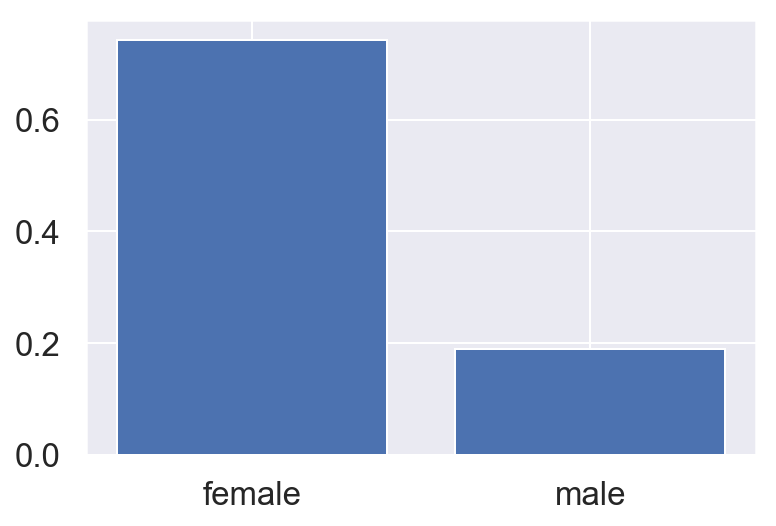

In [16]:
Survived_by_columns_with_plot(data=train, col="Sex")

### Age
- 현재 Age data는 integer 형태로 되어있어서 막대그래프보다는 꺾은선 그래프로 나타내는 것이 더 잘 표현될 것 같다고 생각했지만, data에 포함되어있지 않은 나이가 있기에 train data set과 test data set의 데이터가 동일한 age값을 갖고 있지 않다면 학습할 때 부터 train data set에 포함되어 있지 않은 age는 무조건 사망할 것이라고 예측할 가능성이 높으므로 먼저 두 data set이 동일한 값의 범주를 포함하고 있는지를 확인해 볼 것이다.


- 아래의 코드를 보게 되면 두 data set의 Age값이 서로 다른 범주를 포함하고 있다는 것을 확인할 수 있다. 그러므로 연령대로 나이라는 값을 변환해 줄 것이다.

In [17]:
print("train set과 test set의 Age 범주는 같다? : {}".format(np.sort(test.Age.unique())==np.sort(train.Age.unique())))


train set과 test set의 Age 범주는 같다? : False


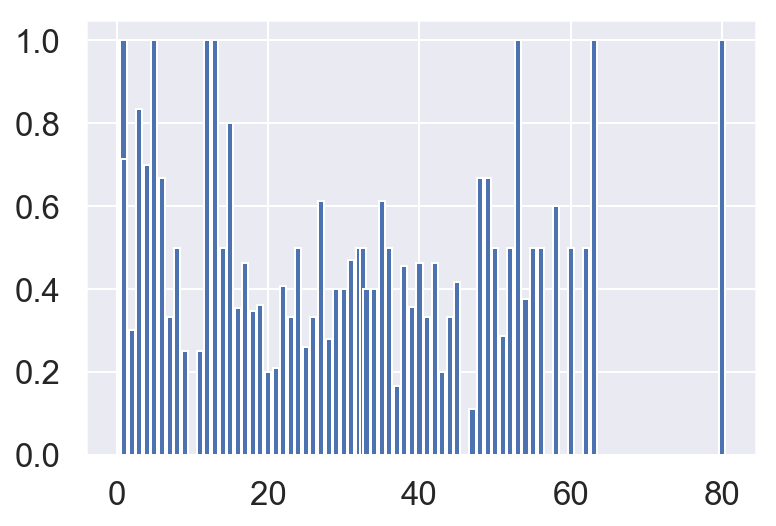

In [18]:
Survived_by_columns_with_plot(data=train, col="Age")

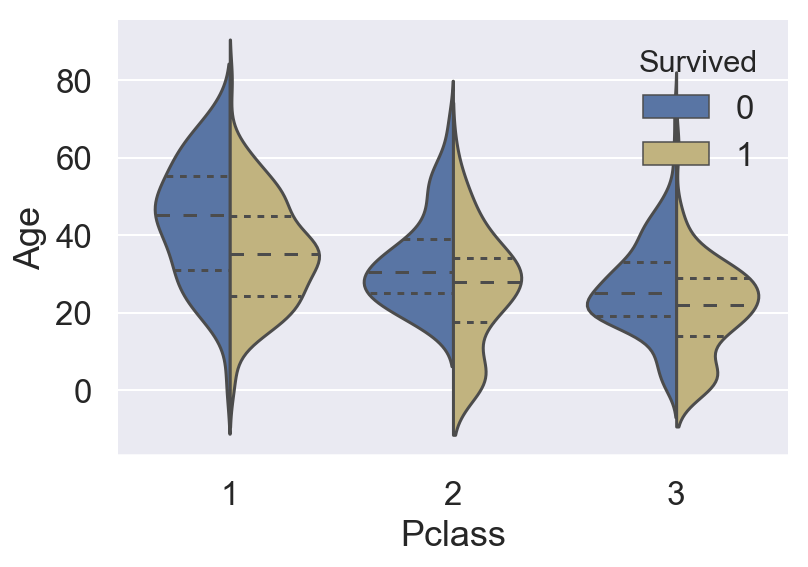

In [19]:
sns.violinplot(x="Pclass", y="Age", hue="Survived",
               split=True, inner="quart",
               palette={1: "y", 0: "b"},
               data=train)
sns.despine(left=True)

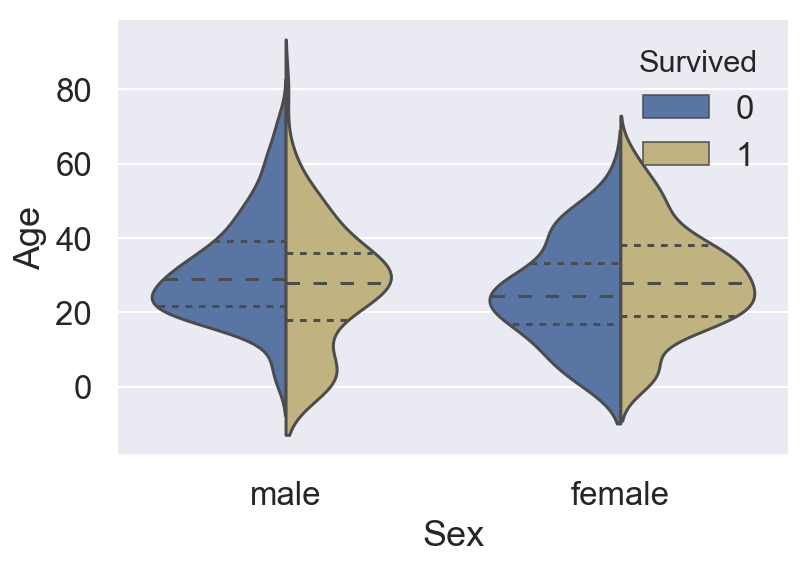

In [20]:
sns.violinplot(x="Sex", y="Age", hue="Survived",
               split=True, inner="quart",
               palette={1: "y", 0: "b"},
               data=train)
sns.despine(left=True)

In [21]:
# 

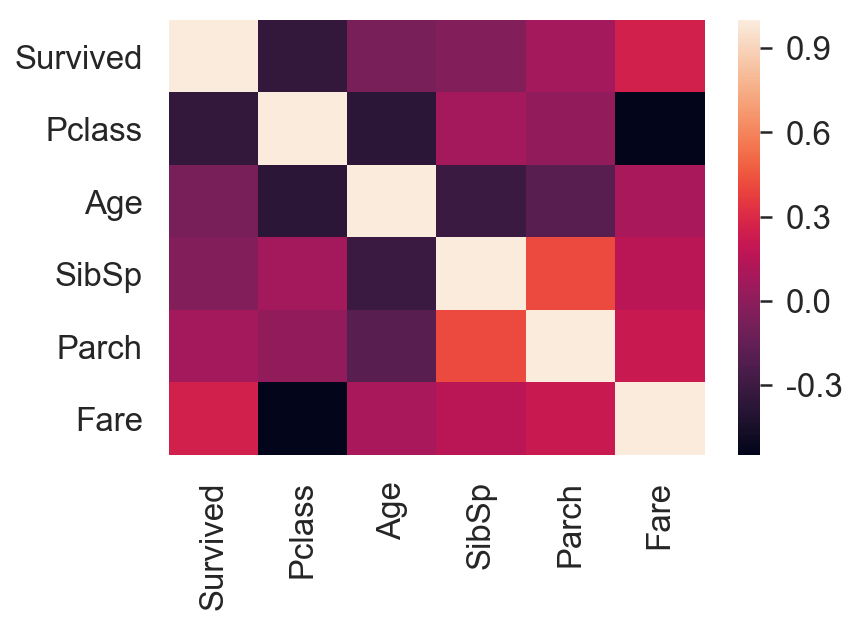

In [22]:
corr=train.corr()
sns.heatmap(corr)

## Pclass별 성별과 연령에 따른 생존 그래프

In [23]:
np.sort(test.Age.unique())

array([ 0.17,  0.33,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  5.  ,
        6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.5 , 12.  , 13.  , 14.  ,
       14.5 , 15.  , 16.  , 17.  , 18.  , 18.5 , 19.  , 20.  , 21.  ,
       22.  , 22.5 , 23.  , 24.  , 25.  , 26.  , 26.5 , 27.  , 28.  ,
       28.5 , 29.  , 30.  , 31.  , 32.  , 32.5 , 33.  , 34.  , 34.5 ,
       35.  , 36.  , 36.5 , 37.  , 38.  , 38.5 , 39.  , 40.  , 40.5 ,
       41.  , 42.  , 43.  , 44.  , 45.  , 46.  , 47.  , 48.  , 49.  ,
       50.  , 51.  , 53.  , 54.  , 55.  , 57.  , 58.  , 59.  , 60.  ,
       60.5 , 61.  , 62.  , 63.  , 64.  , 67.  , 76.  ,   nan])

In [24]:
def Age_group(x):
    """
    위에서 작업한 그래프를 보았을 때 우선 20세 미만, 20세 이상~50세 미만, 50세 이상 이렇게 3가지의 범주로 나누어
    확률을 계산 할 것이다.
    """
    if x < 20:
        return "20_under"
    if 20 <= x < 50:
        return "20_over_50_under"
    if 50 <= x:
        return "50_over"
        

In [25]:
train["Age_group"]=train.Age.apply(lambda x : Age_group(x))
test["Age_group"]=test.Age.apply(lambda x : Age_group(x))

In [26]:
train[train["Survived"]==1].groupby(by=["Age_group"]).size()/train.groupby(by=["Age_group"]).size()

Age_group
20_over_50_under    0.386555
20_under            0.481707
50_over             0.364865
dtype: float64

각 그룹의 train data set중에서 Age가 NAN으로 되어있는 데이터를 제거하고 나서 나머지 데이터들만을 모아 저장하였다. 

In [27]:
missno_Age=train.iloc[list(set(train.index) - set(list(train[np.isnan(train.Age)].index))), :] 

In [28]:
condition = (missno_Age["Sex"]=="male") & (missno_Age["Pclass"]==3) & (missno_Age["SibSp"]==3) \
& (missno_Age["Parch"]==1)

prob=(missno_Age[condition].groupby(by=["Age_group"]).size()/len(missno_Age[condition])).reset_index(name="prob")

In [29]:
prob[prob["prob"]==max(prob["prob"])]

,Age_group,prob
0,20_under,1.0


In [30]:
list(train.Sex.unique())

['male', 'female']

In [31]:
table1 = pd.DataFrame(data=None, columns=["Sex", "Pclass", "SibSp", "Parch", "Age_group"])
for Sex in list(train.Sex.unique()):
    for Pclass in list(train.Pclass.unique()):
        for SibSp in list(train.SibSp.unique()):
            for Parch in list(train.Parch.unique()):
                condition = (missno_Age["Sex"]==Sex) & (missno_Age["Pclass"]==Pclass) & \
                (missno_Age["SibSp"]==SibSp) & (missno_Age["Parch"]==Parch)
                
                prob = (missno_Age[condition].groupby(by=["Age_group"]).size()/len(missno_Age[condition])).reset_index(name="prob")
                max_prob = max(prob["prob"])
                count = sum(prob["prob"]==max_prob)
                print(count)
                if count > 1:
                    table = prob[prob["prob"]==max_prob]
                    select_idx = np.random.randint(0, len(table), 1)[0]
                    table2 = pd.DataFrame(data={"Sex" : [Sex], "Pclass" : [Pclass], "SibSp" : [SibSp], "Parch" : [Parch], "Age_group" : [table["Age_group"][select_idx]]})
                    table1 = pd.concat([table1, table2])
                if count ==1:
                    table = prob[prob["prob"]==max_prob]
                    table2 = pd.DataFrame(data={"Sex" : [Sex], "Pclass" : [Pclass], "SibSp" : [SibSp], "Parch" : [Parch], "Age_group" : [table["Age_group"][0]]})
                    table1 = pd.concat([table1, table2])

table1
                    

1
1


KeyError: 0

In [32]:
train[train["Pclass"]==1].groupby(by=["Sex", "SibSp", "Parch", "Age_group"]).size()/len(train[train["Pclass"]==1])

Sex     SibSp  Parch  Age_group       
female  0      0      20_over_50_under    0.120370
                      20_under            0.009259
                      50_over             0.018519
               1      20_over_50_under    0.013889
                      20_under            0.013889
                      50_over             0.013889
               2      20_over_50_under    0.013889
                      20_under            0.009259
        1      0      20_over_50_under    0.060185
                      20_under            0.018519
                      50_over             0.027778
               1      20_over_50_under    0.027778
                      50_over             0.004630
               2      20_over_50_under    0.009259
                      20_under            0.009259
        2      0      50_over             0.004630
               2      20_over_50_under    0.004630
                      20_under            0.004630
        3      2      20_over_50_under    0

In [30]:
prob_table=train[train["Survived"]==1].\
groupby(by=["Pclass", "Sex", "Age_group"]).size()/train.groupby(by=["Pclass", "Sex", "Age_group"]).size()

First_class=pd.DataFrame(data={"Age_group" : ["20_over_50_under", "20_over_50_under", "20_under","20_under", "50_over",\
                                  "50_over"], 
                               "Sex" : ["female", "male", "female", "male", "female", "male"],
                              "prob" : list(prob_table[:6])})

Second_class=pd.DataFrame(data={"Age_group" : ["20_over_50_under", "20_over_50_under", "20_under","20_under", "50_over",\
                                  "50_over"], 
                                "Sex" : ["female", "male", "female", "male", "female", "male"],
                                "prob" : list(prob_table[6:12])})

Third_class=pd.DataFrame(data={"Age_group" : ["20_over_50_under", "20_over_50_under", "20_under","20_under", "50_over",\
                                  "50_over"],
                               "Sex" : ["female", "male", "female", "male", "female", "male"],
                              "prob" : list(prob_table[12:])})

Third_class["prob"][5]=0
Third_class

,Age_group,Sex,prob
0,20_over_50_under,female,0.392857
1,20_over_50_under,male,0.533333
2,20_under,female,1.000000
3,20_under,male,0.144444
4,50_over,female,0.190476
5,50_over,male,0.000000


In [23]:
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
train[train["Survived"]==1].groupby(by=["Age", "Sex", "SibSp", "Parch"]).size().reset_index(name="prob")

,Age,Sex,SibSp,Parch,prob
0,0.42,male,0,1,1
1,0.67,male,1,1,1
2,0.75,female,2,1,2
3,0.83,male,0,2,1
4,0.83,male,1,1,1
5,0.92,male,1,2,1
6,1.00,female,0,2,1
7,1.00,female,1,1,1
8,1.00,male,0,2,1
9,1.00,male,1,2,1


우선 우리가 최종적으로 예측하고자하는 변수인 Survived의 비율을 살펴보며 imbalanced data의 문제점은 있는지 확인한 결과, 우리의 데이터는 balanced data임을 확인할 수 있었다. 다음으로, 결측치를 포함한 상태로는 문제를 예측함에 있어서 어려움이 존재하게 되므로, 먼저 결측치를 대체하거나 제거하는등의 방향으로 결측치를 처리해 주어야 할 것이다. 이런 조치에 대한 판단의 근거로 먼저 Age에 따른 다른 변수들의 분포를 살펴본 후 특징이 있는지 살펴 볼 것이다.

In [8]:
print(len(train.SibSp[train.SibSp > 0]))
print(len(train.Parch[train.Parch > 0]))

283
213


In [32]:
train["Last_name"]=train.Name.apply(lambda x : x.split(",")[1])
train["Last_name"]=train["Last_name"].apply(lambda x : x.split(".")[1])
Last_name_table=train.groupby(by=["Last_name"]).size().reset_index(name="count")

In [53]:
Last_name_table

,Last_name,count
0,(Ada E Hall),1
1,(Amelia Milley),1
2,(Beila),1
3,(Catherine David),1
4,(Edith Martha Bowerman),1
5,(Elizabeth Anne Maidment),1
6,(Elizabeth Ramell),1
7,(Hedwig),1
8,(Karolina),1
9,"(Lucille Christiana Sutherland) (""Mrs Morgan"")",1


In [12]:
train["Age_group"]=np.around(train.Age[np.isnan(train.Age) == False], decimals=-1)

In [24]:
train[np.isnan(train["Age_group"])== False][["Age_group","SibSp"]].groupby(by=["Age_group", "SibSp"]).size().re

Age_group  SibSp
0.0        0         10
           1         16
           2          5
           3          4
           4          8
           5          1
10.0       0         10
           1          9
           2          1
           3          3
           4          8
           5          3
20.0       0        163
           1         43
           2         11
           3          3
           4          2
           5          1
30.0       0        128
           1         45
           2          3
           3          2
40.0       0         87
           1         42
           2          3
50.0       0         37
           1         22
           2          2
60.0       0         29
           1          5
70.0       0          6
           1          1
80.0       0          1
dtype: int64

In [30]:
train[np.isnan(train.Age) == False].groupby(by=["Age", "Sex"])

In [17]:
train.Age[np.isnan(train.Age)]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
29    NaN
31    NaN
32    NaN
36    NaN
42    NaN
45    NaN
46    NaN
47    NaN
48    NaN
55    NaN
64    NaN
65    NaN
76    NaN
77    NaN
82    NaN
87    NaN
95    NaN
101   NaN
107   NaN
109   NaN
121   NaN
126   NaN
128   NaN
140   NaN
154   NaN
       ..
718   NaN
727   NaN
732   NaN
738   NaN
739   NaN
740   NaN
760   NaN
766   NaN
768   NaN
773   NaN
776   NaN
778   NaN
783   NaN
790   NaN
792   NaN
793   NaN
815   NaN
825   NaN
826   NaN
828   NaN
832   NaN
837   NaN
839   NaN
846   NaN
849   NaN
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [ ]:
train["Sex"]=train.Sex.apply(lambda x: 1 if x == "male" else 0)
test["Sex"]=test.Sex.apply(lambda x: 1 if x == "male" else 0)

train["Cabin_exist"]=train["Cabin"].apply(lambda x: 1 if type(x) == str else 0)
test["Cabin_exist"]=test["Cabin"].apply(lambda x: 1 if type(x) == str else 0)

In [10]:
train.groupby(by=["Pclass", "Cabin_exist", "Survived"]).size()

Pclass  Cabin_exist  Survived
1       0            0            21
                     1            19
        1            0            59
                     1           117
2       0            0            94
                     1            74
        1            0             3
                     1            13
3       0            0           366
                     1           113
        1            0             6
                     1             6
dtype: int64

In [11]:
# def drop_col(dataset, col_name):
#     """
#     데이터 중 불필요한 컬럼을 제거해주는 함수
#     """
#     dataset.drop(columns=col_name, axis=1, inplace=True)
    
#     return dataset

In [80]:
len(train.Age)

891

In [78]:
sum(np.isnan(train.Age))

177

In [71]:
def embedding_value_change(dataset, col_name):
    table=(dataset[train.Survived==1].groupby(by=[col_name]).size()/dataset.groupby(by=[col_name]).size()).reset_index(name="prob")
    prob_tuple={}
    for i in np.arange(len(table)):
        prob_tuple.update({table[col_name][i]:table["prob"][i]})
    print(prob_tuple)
    cleanup_nums = {col_name : prob_tuple}
    dataset.replace(cleanup_nums, inplace=True)
    return dataset

In [72]:
embedding_value_change(train, "Pclass")

{1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0.242363,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0.629630,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,0.242363,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,0.629630,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,0.242363,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,0.242363,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,0.629630,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,0.242363,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,0.242363,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,0.472826,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
